## Aprendizaje automático, 2024-2025

## Práctica 2, Clustering

### Introducción

En esta práctica vas a programar el algoritmo de clustering K-Means y el algoritmo EM para una mezcla de gausianas. Compararás tu implementación con la de scikit-learn. El material de la práctica incluye:

- El fichero ``aa_p2.py``, en el que deberás completar el código de las clases ``KMeans`` y ``GMM``.

- Este notebook, ``aa_p2.ipynb``, en el que se describen los ejercicios y se incluyen algunos tests para tu código. El notebook importa algunas clases y funciones del fichero ``aa_p2.py``, por lo que este último deberá estar accesible en el *import path*.



### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import aa_p2 as aa_p2

# Para normalizar en KMeans
from sklearn.preprocessing import StandardScaler

### Algoritmo K-Means

Completa, en el fichero ``aa_p2.py``, el código de la clase ``KMeans``. Debes incluir al menos los dos métodos siguientes, respetando su interfaz:

- ``fit(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y ejecuta el algoritmo K-Means para ajustar ``self.num_clusters`` clusters a los datos. El número de iteraciones del algoritmo vendrá dado por ``self.num_iters``. Los centros de los clusters se almacenarán en la lista ``self.centers``.

- ``predict(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y devuelve un array de numpy de dimensiones ``(n,)`` con el índice del cluster al que pertenece cada punto. El método ``predict`` no se puede invocar sobre un objeto si no se ha hecho ``fit`` previamente.

- ``get_centers(self)``: Devuelve los centros de los clusters como una lista de arrays de numpy, cada uno de dimensiones ``(d,)``.

Puedes incluir otros métodos auxiliares si lo consideras necesario.

Una vez programado, puedes probar el código con los siguientes tests (no exhaustivos).

In [2]:
importlib.reload(aa_p2)
from aa_p2 import KMeans, plotModel

Carga de datos (Iris):

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
t = iris.target

Ejecución del algoritmo:

In [4]:
km = KMeans(3, 10, random_state=123)
x = StandardScaler().fit_transform(x)
km.fit(x)
y = km.predict(x)
c = km.get_centers()

Visualización de los resultados:

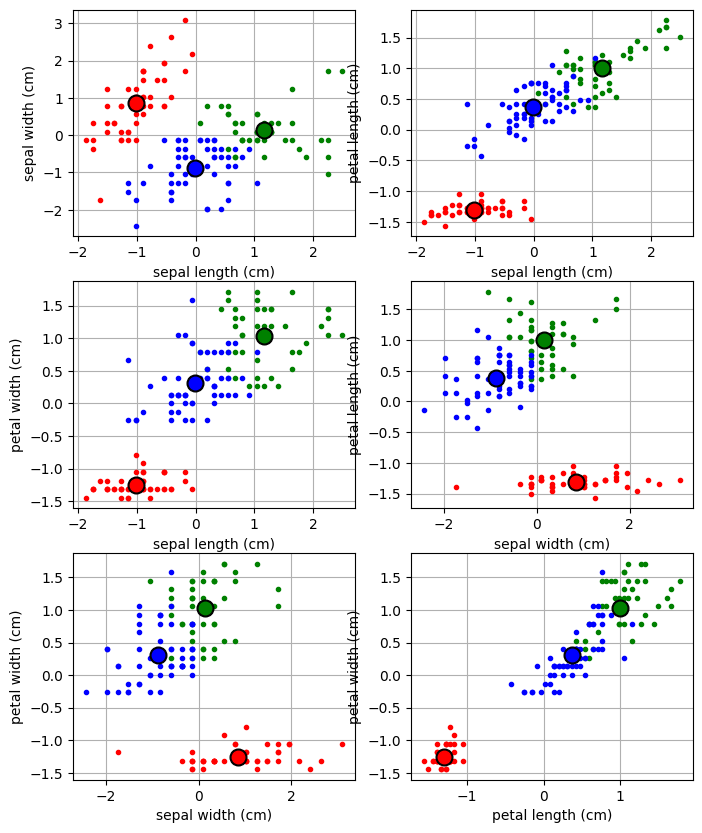

In [5]:
plt.figure(figsize=(8,10))
n_classes = 3

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    xplot = x[:, pair]

    plt.subplot(3, 2, pairidx + 1)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.grid(True)

    plotModel(xplot, y, "", centers=c[:, pair])

plt.show()

Creación de datos (make_blobs):

In [6]:
from sklearn.datasets import make_blobs
x, t = make_blobs(n_samples=500, n_features=2, centers=5, shuffle=True, random_state=15)

Ejecución del algoritmo y visualización de resultados:

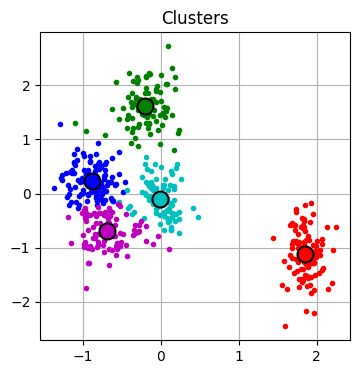

In [7]:
km = KMeans(5, 10, random_state=125)
x = StandardScaler().fit_transform(x)
km.fit(x)
y = km.predict(x)
c = km.get_centers()
plotModel(x, y, "Clusters", centers=c, new_figure=True)

### Pruebas del código y comparación con scikit-learn

Las pruebas anteriores son sólo una guía y no pretenden ser exhaustivas. Incluye en este apartado de la práctica un conjunto de pruebas para verificar que el algoritmo funciona bien. Estas pruebas deben incluir una comparación con [sklearn.cluster.KMeans](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) de scikit-learn.

Comenta tus resultados y explica las diferencias observadas, en caso de que las haya.

In [8]:
# Imports para tests
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as SKMeans
from sklearn.metrics import calinski_harabasz_score as chscore

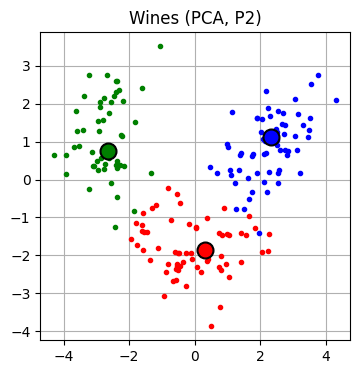

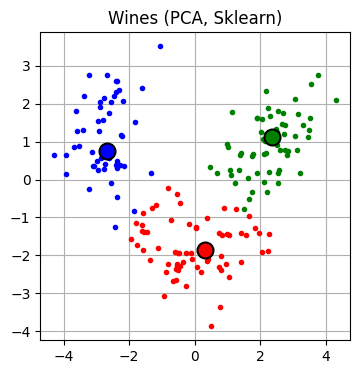

In [9]:
# Clasificación Multi-dimensional: Wines Dataset

# Lectura del csv de wines (moodle)
data = pd.read_csv('./wine_dataset.csv', delimiter=';', header=0)
x = StandardScaler().fit_transform(data.drop(columns=['Type']).values)

# Ejecución con KMeans de SKLearn
skmeans = SKMeans(n_clusters=3,init='k-means++', n_init=1,max_iter=10, random_state=2)    
skmeans.fit(x)
sy = skmeans.predict(x)

# Ejecución con KMeans propio
kmeans = KMeans(3, 10, random_state=111)
kmeans.fit(x)
y = kmeans.predict(x)

# Reducción de dimensiones para poder graficar
x_pca = PCA(n_components=2).fit_transform(x)
sc_pca = PCA(n_components=2).fit_transform(skmeans.cluster_centers_)
c_pca = PCA(n_components=2).fit_transform(kmeans.get_centers())

# Comparación de ambos modelos
plotModel(x_pca, y, "Wines (PCA, P2)", centers=c_pca, new_figure=True)
plotModel(x_pca, sy, "Wines (PCA, Sklearn)", centers=sc_pca, new_figure=True)

### Explicación
En esta prueba se está tratando de comprobar las capacidades de nuestra versión de KMeans para poder realizar agrupaciones correctas en un conjunto de muchas dimensiones. Para esto, utilizamos la base de datos `wine_dataset.csv` de las transparencias de moodle, que tienen un total de 13 features.

Como queremos ver si el algoritmo clasifica de manera similar al KMeans de sklearn, optamos por representarlo de manera gráfica. Si bien podría hacerse utilizando *pares* de variables, igual que se hace en el ejemplo del iris, esto resultaría en un número demasiado alto de combinaciones para mostrar, y con tantas dimensiones es posible que algunas de estas agrupaciones no tenga sentido. En lugar de ello, optamos por reducir los datos (estandarizados) utilizando PCA.

De esta forma, los pasos a seguir son:
1. Estandarizar los datos x. En otro caso, un atributo (p.ej. *Proline*) toma valores mucho más significativos que el resto de elementos, lo que genera un enorme bias en el algoritmo.
2. Realizar *fit* y *predict* con ambos algoritmos, sobre el dataset original (pero sin su clase). De esto se obtienen las labels de sklearn (sy) y las propias (y).
3. No las comparamos directamente, porque estas no representan un orden absoluto. El conjunto (en su totalidad) que sklearn clasificó como "1" puede acabar como "2" o "0" en nuestro caso, así que esta medida no es viable.
4. Aplicar **PCA** a los datos originales `x` para aproximarlos a dos dimensiones
5. Aplicar **PCA** a las labels dadas por los metodos *predict* con el mismo proposito
6. Realizar los plots de `x_pca` contra ambos pares de tags `y_pca` y `sy_pca`.

Como puede verse, las clasificaciones (excepto por los "nombres de cluster", que hacen variar el color) son exactamente las mismas para ambos datos. Es posible también que, cambiando la semilla utilizada por nuestro KMeans, estos resultados varien ligeramente. Esto se debe a que, a diferencia del KMeans implementado por sklearn, el algoritmo se ejecuta una sola vez y por tanto los resultados dependen directametne del centroide que sea elegido. Si se hiciera este cambio, y pusiese a ambos métodos por lo menos 10 iteraciones, los resultados serían los mismos prácticamente siempre.

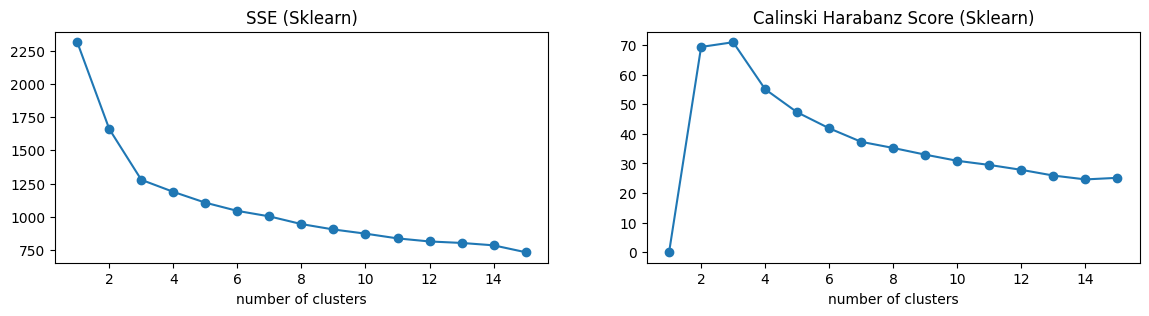

In [10]:
Nclusters_max = 15
squalities = []
sinertias = []

for k in range(1,Nclusters_max+1):
    skmeans = SKMeans(n_clusters=k,init='k-means++', n_init=1,max_iter=10, random_state=2)    
    skmeans.fit(x)
    sy = skmeans.predict(x)
    
    sinertias.append(skmeans.inertia_)
    if k > 1:
        squalities.append(chscore(x, sy))
    else:
        squalities.append(0)

fig = plt.figure(figsize=(14,3))

ax = plt.subplot(1,2,1)
plt.plot(range(1,Nclusters_max+1), sinertias, marker='o')
plt.xlabel('number of clusters')
plt.title('SSE (Sklearn)')

ax = plt.subplot(1,2,2)
plt.plot(range(1,Nclusters_max+1), squalities, marker='o')
plt.xlabel('number of clusters')
plt.title('Calinski Harabanz Score (Sklearn)')
plt.show()

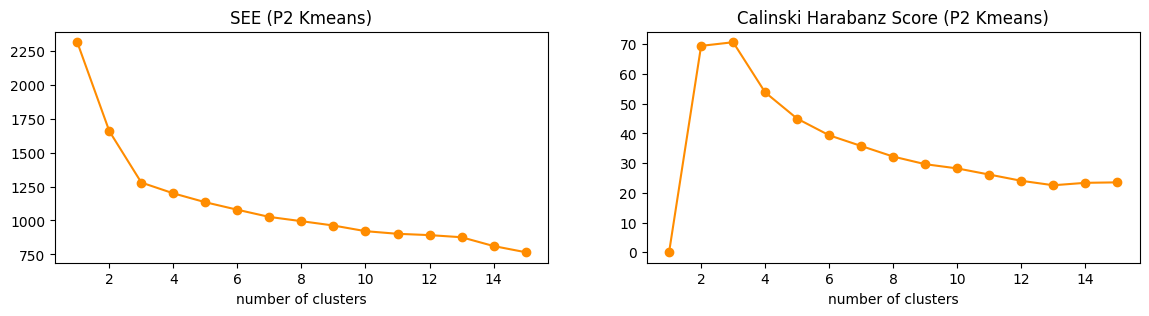

In [11]:
Nclusters_max = 15
qualities = []
inertias = []

for k in range(1,Nclusters_max+1):
    kmeans = KMeans(k, 10, random_state=123)
    kmeans.fit(x)
    y = kmeans.predict(x)
    
    inertias.append(kmeans.get_inertias(x))
    if k > 1:
        qualities.append(chscore(x, y))
    else:
        qualities.append(0)

fig = plt.figure(figsize=(14,3))

ax = plt.subplot(1,2,1)
plt.plot(range(1,Nclusters_max+1), inertias, marker='o', color="darkorange")
plt.xlabel('number of clusters')
plt.title('SEE (P2 Kmeans)')

ax = plt.subplot(1,2,2)
plt.plot(range(1,Nclusters_max+1), qualities, marker='o', color="darkorange")
plt.xlabel('number of clusters')
plt.title('Calinski Harabanz Score (P2 Kmeans)')
plt.show()

In [12]:
for i, si in zip(inertias, sinertias):
    print("{:.2f}".format(i - si), end=" ")
print()
for q, sq in zip(qualities, squalities):
    print("{:.2f}".format(q - sq), end=" ")
print()


0.00 -0.94 1.80 13.00 28.74 35.40 23.72 50.42 59.03 48.83 65.16 78.53 74.05 27.07 33.50 
0.00 0.14 -0.22 -1.22 -2.29 -2.49 -1.52 -3.02 -3.32 -2.66 -3.34 -3.78 -3.35 -1.22 -1.61 


### Explicación
En esta prueba se está tratando de comprobar la correctitud de nuestra versión de KMeans sobre el mismo dataset utilizado anteriormente. Cuando se trabaja con KMeans, existen un par de maneras de determinar el hiperparámetro *k* si este no es conocido de antemano: SSE y el Score de Calinski Harabaz.

El **SSE** es la suma de distancias cuadradas entre los centroides del cluster y sus elementos. Si bien el objetivo de Kmeans es minimizar este valor, eso es únicamente bajo una misma configuración de cluster, es decir, bajo un mismo *k*. Tener un *k* igual al número de nodos, con centroides generados aleatoriamente y distintos, generará un centroide sobre cada punto, dando un SSE de 0. El valor ideal de *k* suele verse "evaluando los codos" de este valor, que coinciden con los resultados de sklearn según se ve arriba. Como segunda consideracion, podemos ver que el SSE efectivamente se va acercando al cero a medida que se incrementa *k*, lo que corrobora la correctitud de nuestra implementación.

Sobre el caso del score de Calinski Harabaz, este mide la calidad del clustering por medio de una puntuación. Por tanto, lo que se busca en este caso es maximizar su valor, y comprobar que este va disminuyendo a medida que uno se aleja de la configuración ideal de clusters. Esto ocurre tanto con la versión de sklearn como la propia, donde se marca el ´número ideal como 3, lo que se estaba graficando anteriormente.

Finalmente, la última celda muestra una comparativa directa de las métricas obtenidas por ambos resultados. En general, los resultados son muy similares al principio (pocos clusteres, configuración ideal), varían en mayor medida cuando la calidad del cluster (o su SSE) va decayendo, y vuelven a asemejarse en el momento en el que estas se estabilizan. No se espera que ambos algoritmos sean exactamente iguales en estas métricas, pues estos resultados son muy dependientes de la inicialización de centroides. Los resultados obtenidos experimentalmente son *muy* similares, lo que permite confirmar este hecho.  

### Algoritmo EM para una mezcla de gausianas

Completa, en el fichero ``aa_p2.py``, el código de la clase ``GMM``. Debes incluir al menos los dos métodos siguientes, respetando su interfaz:

- ``fit(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y ejecuta el algoritmo EM para ajustar una mezcla de ``self.num_components`` componentes gausianas a los datos. El número de iteraciones del algoritmo vendrá dado por ``self.num_iters``. Los centros, covarianzas y prioris de cada componente se almacenarán en las listas ``self.centers``, ``self.covariances`` y ``self.weights``, respectivamente.

- ``predict(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y devuelve un array de numpy de dimensiones ``(n, self.num_components)`` con las probabilidades de pertenencia de cada punto a cada una de las componentes (la suma por filas debe ser 1). El método ``predict`` no se puede invocar sobre un objeto si no se ha hecho ``fit`` previamente.

Puedes incluir otros métodos auxiliares si lo consideras necesario.

Una vez programado, puedes probar el código con el siguiente test (no exhaustivo).

In [13]:
importlib.reload(aa_p2)
from aa_p2 import GMM, plotModelGMM

Creación de datos (make_blobs):

In [14]:
x, t = make_blobs(n_samples=400, n_features=2, centers=4, shuffle=True, random_state=21)

Ajuste a los datos de una mezcla de gausianas y visualización de los resultados:

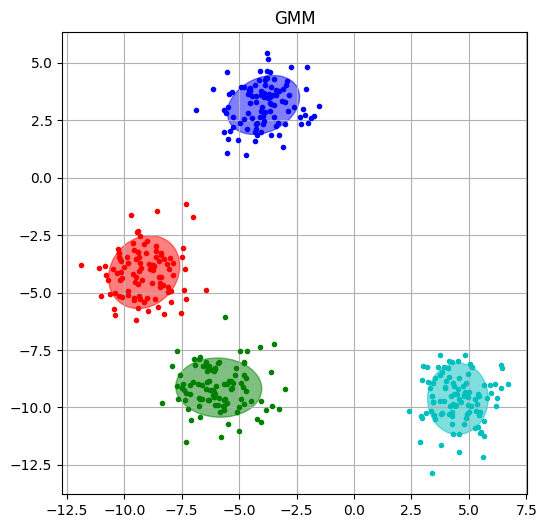

In [15]:
gmm = GMM(4, 100, random_state=123)
gmm.fit(x)
plotModelGMM(x, gmm, "GMM")

### Pruebas del código y comparación con scikit-learn

La prueba anterior es sólo una guía y no pretende ser exhaustiva. Incluye en este apartado de la práctica un conjunto de pruebas para verificar que el algoritmo funciona bien. Estas pruebas deben incluir una comparación con [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) de scikit-learn.

Comenta tus resultados y explica las diferencias observadas, en caso de que las haya.

In [16]:
# Imports para tests
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

In [17]:
def gaussian_sample_generator(dim: int, n:int, mean, cov, seed):
    """
    Genera una muestra gausisana aleatoria de dimension `dim` > 1, con tamaño
    de muestra `n`. Se espera una media de dimension D y una matriz de covarianza
    DxD simétrica semidefinida positivo.
    """
    return np.random.default_rng(seed=seed).multivariate_normal(mean, cov, n)

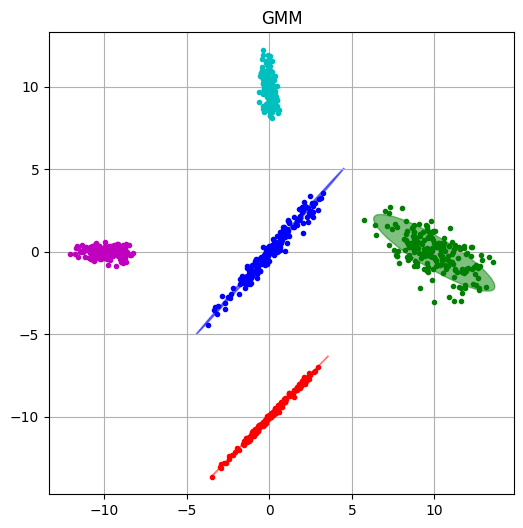

In [18]:
# Graficado de datos gausianos
samples = 1000
means = [[0,0], [10,0], [0,10], [-10, 0], [0, -10]]
covs = []
x = []
for i in range(0,5):
    cov = np.random.uniform(low=-1.5, high=1.5, size=(2,2))
    cov @= cov.T
    covs.append(cov)
    
    x.append(gaussian_sample_generator(dim=2, n=int(samples/5), mean=means[i], cov=cov, seed=69))
x = np.concatenate(x, axis=0)

gmm = GMM(num_components=5, num_iters=100, random_state=123)
gmm.fit(x)

plotModelGMM(x, gmm, "GMM")

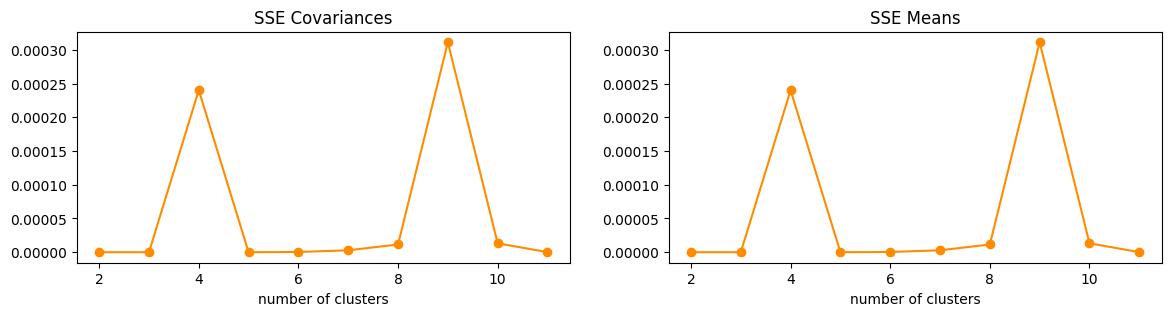

In [19]:
#GMM vs sklearn.GaussianMixture en múltiples dimensiones
dims = 12
samples = 1000
components = 5

sse_covars = []
sse_means = []


for dim in range(2,dims):
    # Generar medias en distintas esquinas 2D
    means = [[0,0], [10,0], [0,10], [-10, 0], [0, -10]]
    covs = []
    x = []

    # Escalado de medias a dims dimensiones
    for k in range(0, len(means)):
        for i in range(2, dim):
            means[k].append(0)

    # Generación de datos
    for i in range(0,components):
        cov = np.random.uniform(low=-1.5, high=1.5, size=(dim,dim))
        cov @= cov.T
        covs.append(cov)
        
        x.append(gaussian_sample_generator(dim=dim, n=int(samples/components), mean=means[i], cov=cov, seed=69))
    x = np.concatenate(x, axis=0)

    # Fit propio -> obtención de covarianzas y medias
    gmm = GMM(num_components=components, num_iters=100, random_state=123)
    gmm.fit(x)

    # Fit sklearn -> obtención covarianzas y medias
    gmm_ = GaussianMixture(components, max_iter=100, random_state=123)
    gmm_.fit(x)

    # Ordenado por esquina superior de covarianzas
    p2i, ski = np.argsort(gmm.covariances[:, 0, 0]), np.argsort(gmm_.covariances_[:, 0, 0])
    p2c, skc = gmm.covariances[p2i], gmm_.covariances_[ski]

    # Ordenado por valor X de medias
    p2i, ski = np.argsort(gmm.centers[:, 0]), np.argsort(gmm_.means_[:, 0])
    p2m, skm = gmm.covariances[p2i], gmm_.covariances_[ski]

    # Diferencias entre modelo propio y sklearn
    sse_covars.append(np.sum(np.square(p2c-skc)))
    sse_means.append(np.sum(np.square(p2m-skm)))


fig = plt.figure(figsize=(14,3))

ax = plt.subplot(1,2,1)
plt.plot(range(2,dims), sse_covars, marker='o', color="darkorange")
plt.xlabel('number of clusters')
plt.title('SSE Covariances')

ax = plt.subplot(1,2,2)
plt.plot(range(2,dims), sse_means, marker='o', color="darkorange")
plt.xlabel('number of clusters')
plt.title('SSE Means')
plt.show()

## Explicación
De la misma forma que se hizo con KMeans, este test prueba la capacidad de nuestra implementación de GMM de utilizarse en puntos gausianos generados en múltiples dimensiones. Para ello, utilizamos la función `multivariate_normal` de los generadores de numpy para crear distribuciones de D dimensiones en base a covarianzas y medias pre-generadas.  

Lo que se está midiendo en este caso es el **SSE**, la suma de distancias cuadradas, pero sobre los valores generados por el método *fit*; es decir, los parámetros que este algoritmo define para maximizar el Log-Likelihood. Como puede verse en la gráfica de más arriba, aún si las covarianzas se encuentran generadas en el rango de [-1.5,1.5], el máximo error observado hasta 12 dimensiones entre ambos parametros es de 0.0003. Este mismo comportamiento se observa para las medias, lo que indica una muy buena estimación por parte de nuestro algortimo.

### Entrega

La entrega incluirá:

- El fichero ``aa_p2.py`` con el código de las clases ``KMeans`` y ``GMM``.

- Este notebook con las pruebas que hayas diseñado para comprobar la corrección de tu código, así como las comparaciones con ``KMeans`` y ``GaussianMixture`` de scikit-learn y tus comentarios y conclusiones.

Ambos ficheros se incluirán en un fichero comprimido con nombre ``aa_p2.zip`` y se entregarán a través de Moodle antes de la fecha límite establecida.